<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/DC_PC/NGC6822_DC_PC_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1036, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 1036 (delta 208), reused 238 (delta 147), pack-reused 665
Receiving objects: 100% (1036/1036), 84.40 MiB | 11.89 MiB/s, done.
Resolving deltas: 100% (488/488), done.
Updating files: 100% (128/128), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
Z = 0.01
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [4]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [5]:
file_address = '/content/NGC_6822/Data/final_data_v2.csv'
df = pd.read_csv(file_address)
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [6]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.12,S,0.055301,1.200
1,10784.00,296.215450,-14.834690,17.250,16.13,S,0.036084,1.120
2,11004.00,296.273410,-14.808610,17.400,16.20,S,0.043961,1.200
3,11029.00,296.283080,-14.804970,17.260,16.15,S,0.053182,1.110
4,12050.00,296.254270,-14.817640,17.970,16.63,S,0.029053,1.340
...,...,...,...,...,...,...,...,...
372,89.99,296.003693,-14.974893,18.192,17.14,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.27,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.59,s,0.011856,0.950
375,20022.00,296.208160,-14.726160,13.890,12.76,s,0.078605,1.130


In [7]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [8]:
X = (df['J-Ks'])
Y = (df['Ks'])

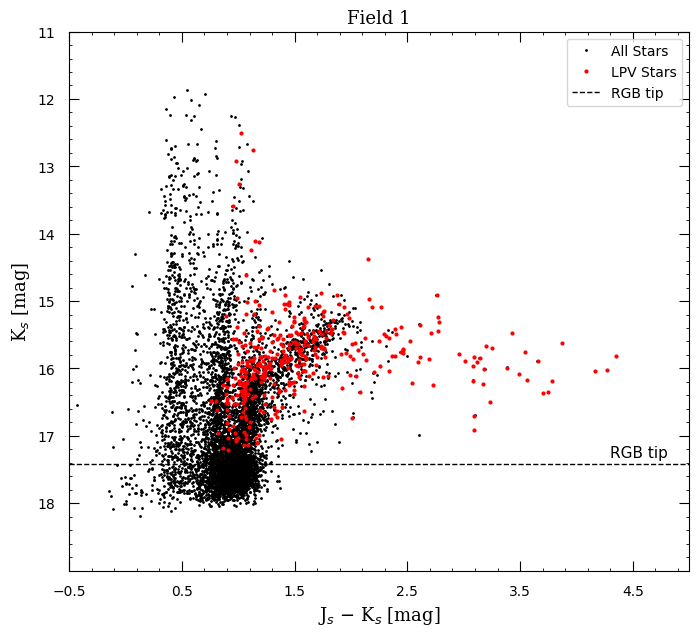

In [9]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [10]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-khbmvy43
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-khbmvy43
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 12047a307121ea075f7e1ac0a2e52806a7886b8d
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.4-py3-none-any.whl size=2573 sha256=98a9c8a08e34b58bbd526cb532e33828b81c9ebf64b03aff04fa8e8cbc92319e
  Stored in directory: /tmp/pip-ephem-wheel-cache-o5bypfr_/wheels/82/b8/db/4179fef6fc03770dd498d786816b5f961dce1b9a70bd9499cd
Successfully built AstroDC


In [11]:
from AstroDC import AstroDC

In [12]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Wed Jan 25 23:38:44 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [13]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 11:57:57 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [14]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01 = ISO_df_01[ISO_df_01['Kmag'] < 30]
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.6,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.0100,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.6,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.0100,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.6,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.0100,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.6,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.0100,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.6,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.0100,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,0.01,-0.17553,10.1,0.935629,2.458367,0.691,3.302,3.5091,-0.036,7,...,0.0112,-3.486,4.272,2.952,1.333,-0.616,-2.739,-5.087,-6.122,-6.482
20655,0.01,-0.17553,10.1,0.935630,2.458368,0.683,3.335,3.5055,-0.089,7,...,0.0112,-3.568,4.274,3.075,1.495,-0.545,-2.723,-5.182,-6.218,-6.586
20656,0.01,-0.17553,10.1,0.935630,2.458368,0.672,3.361,3.5040,-0.127,7,...,0.0112,-3.632,4.263,3.111,1.543,-0.539,-2.744,-5.251,-6.287,-6.660
20657,0.01,-0.17553,10.1,0.935630,2.458368,0.664,3.368,3.5058,-0.133,7,...,0.0112,-3.650,4.237,3.019,1.423,-0.624,-2.806,-5.263,-6.298,-6.668


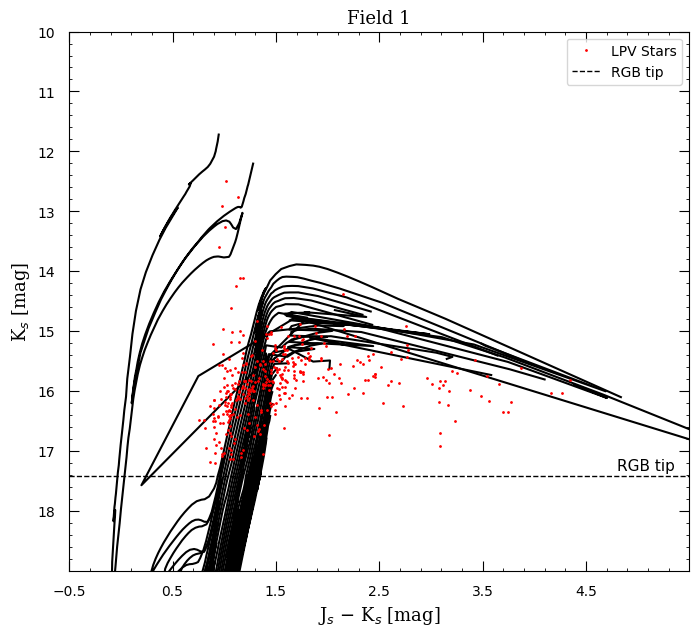

In [15]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [16]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1 = ISO_df_1[ISO_df_1['Kmag'] < 30]
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.60,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.010000,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.60,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.010000,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.60,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.010000,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.60,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.010000,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.60,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.010000,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21222,0.01,-0.17553,10.05,0.966879,2.465708,0.692,3.414,3.4894,-0.226,8,...,0.009833,-3.765,4.332,3.594,2.148,-0.188,-2.525,-5.433,-6.476,-6.867
21223,0.01,-0.17553,10.05,0.966879,2.465708,0.683,3.084,3.5384,0.294,8,...,0.009833,-2.939,4.190,2.148,0.296,-1.121,-2.716,-4.444,-5.450,-5.757
21224,0.01,-0.17553,10.05,0.966880,2.465708,0.657,3.429,3.4896,-0.263,8,...,0.009833,-3.802,4.341,3.595,2.138,-0.210,-2.552,-5.468,-6.510,-6.904
21225,0.01,-0.17553,10.05,0.966881,2.465709,0.648,3.101,3.5382,0.254,8,...,0.009833,-2.981,4.188,2.131,0.269,-1.155,-2.755,-4.486,-5.491,-5.801


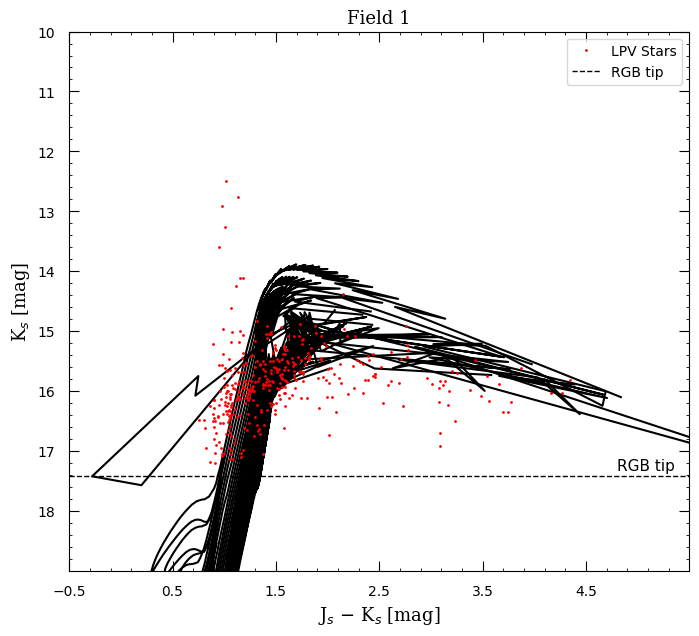

In [17]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')


#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [18]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [19]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = (J_min) - ( K_min)

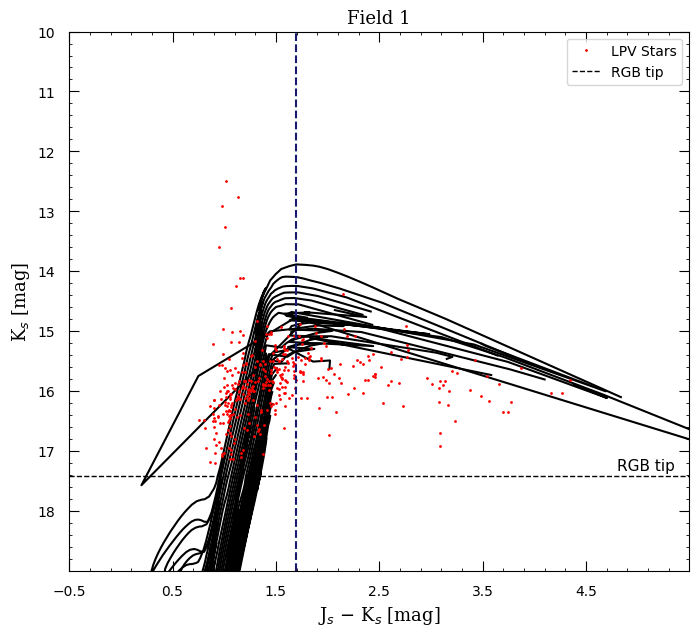

In [20]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

plt.legend(loc='upper right')
plt.savefig('CMD_peak_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

Slope : Carbon

In [21]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = df_Correction_C['Jmag'] - df_Correction_C['Kmag']
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [22]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_C_prime.append( K_diff / J_K_diff )
        Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 : 
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [23]:
LOG_AGE_O_prime = LOG_AGE_O[0:3]

df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = df_Correction_O['Jmag'] - df_Correction_O['Kmag']
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O_prime)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [24]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 : 
        Slope_O_prime.append( K_diff / J_K_diff )
        Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 : 
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

In [25]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.24966752992132735
Slope_O : 0.6711676648742084


Slope : Visualization

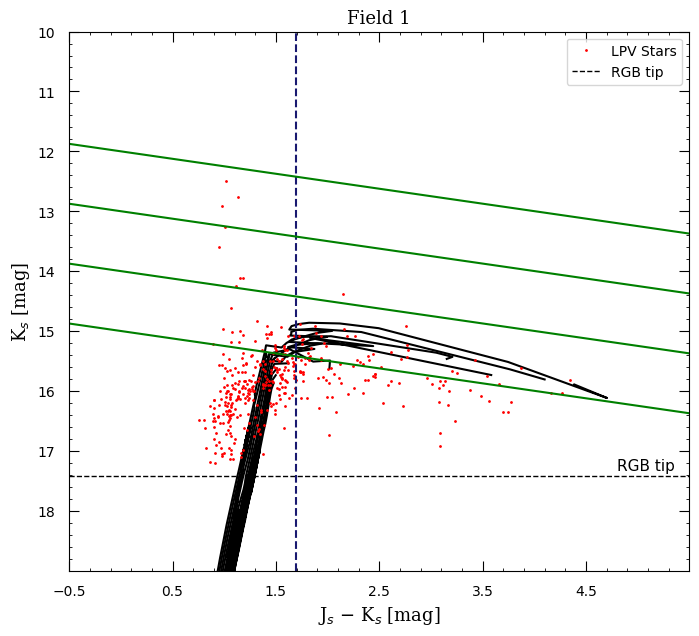

In [26]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

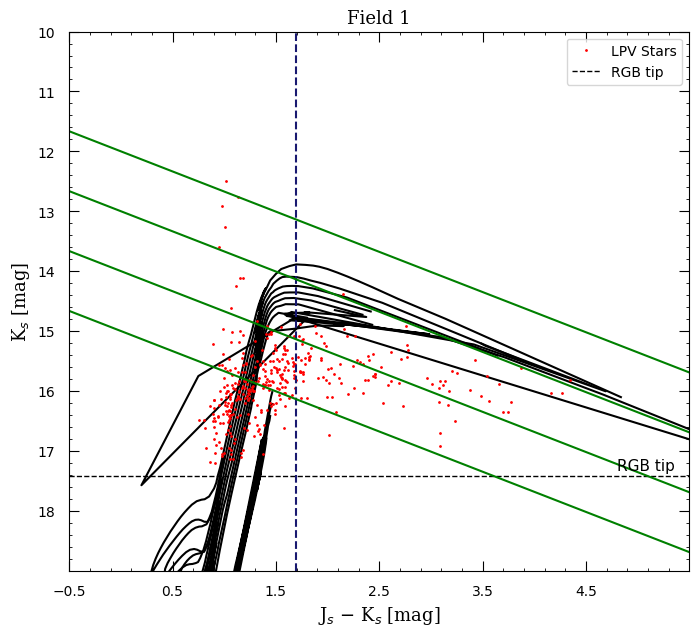

In [27]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slop lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [28]:
df_prime = df[(df['J-Ks']) > X_peak_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [29]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

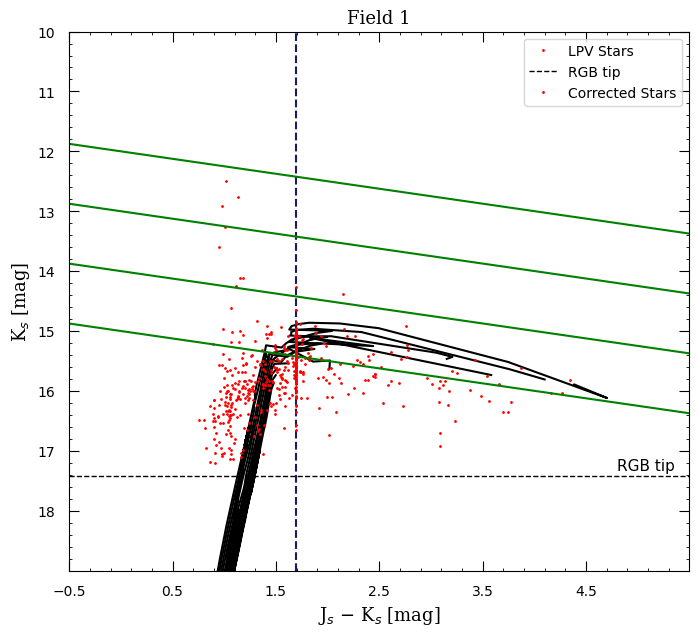

In [30]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

#Corrected Stars with carbon slope
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'Corrected Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [31]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [32]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.01,-0.750,-7.390,NaN,-11.777
1,0.01,-0.402,-3.296,-11.777,-11.396
2,0.01,-0.173,-0.677,-11.396,-11.016
3,0.01,-0.301,-2.189,-11.016,-10.635
4,0.01,-0.217,-1.196,-10.635,-10.254
5,0.01,-0.583,-4.950,-10.254,-9.873
6,0.01,-0.305,-2.210,-9.873,-9.492
7,0.01,-0.309,-2.245,-9.492,-9.112
8,0.01,-0.410,-3.168,-9.112,-8.731
9,0.01,-0.292,-2.137,-8.731,-8.350


In [33]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [34]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

In [35]:
print(f'a: {a}   b: {b}')

a: -0.166   b: -1.17


$Log(M/M_s) = a \times K_s + b$

In [36]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

In [37]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

7
C Star --> 7
8
C Star --> 8
9
C Star --> 9
10
C Star --> 10
11
C Star --> 11
12
C Star --> 12
13
C Star --> 13
14
C Star --> 14
15
C Star --> 15
17
C Star --> 17
18
O Star --> 18
19
O Star --> 19
20
C Star --> 20
21
C Star --> 21
22
C Star --> 22
23
C Star --> 23
24
O Star --> 24
26
C Star --> 26
27
C Star --> 27
29
C Star --> 29
31
C Star --> 31
32
C Star --> 32
40
C Star --> 40
47
C Star --> 47
48
C Star --> 48
49
C Star --> 49
50
C Star --> 50
51
C Star --> 51
52
C Star --> 52
53
C Star --> 53
54
C Star --> 54
55
C Star --> 55
56
O Star --> 56
57
C Star --> 57
58
C Star --> 58
59
C Star --> 59
60
C Star --> 60
61
C Star --> 61
62
C Star --> 62
63
C Star --> 63
64
C Star --> 64
65
C Star --> 65
66
C Star --> 66
67
C Star --> 67
68
C Star --> 68
69
C Star --> 69
70
C Star --> 70
71
C Star --> 71
72
C Star --> 72
73
C Star --> 73
74
C Star --> 74
75
C Star --> 75
76
C Star --> 76
77
C Star --> 77
78
C Star --> 78
79
C Star --> 79
80
C Star --> 80
81
C Star --> 81
82
C Star --> 82
88


In [38]:
df_Corrected

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.12,S,0.055301,1.200
1,10784.00,296.215450,-14.834690,17.250,16.13,S,0.036084,1.120
2,11004.00,296.273410,-14.808610,17.400,16.20,S,0.043961,1.200
3,11029.00,296.283080,-14.804970,17.260,16.15,S,0.053182,1.110
4,12050.00,296.254270,-14.817640,17.970,16.63,S,0.029053,1.340
...,...,...,...,...,...,...,...,...
372,89.99,296.003693,-14.974893,18.192,17.14,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.27,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.59,s,0.011856,0.950
375,20022.00,296.208160,-14.726160,13.890,12.76,s,0.078605,1.130


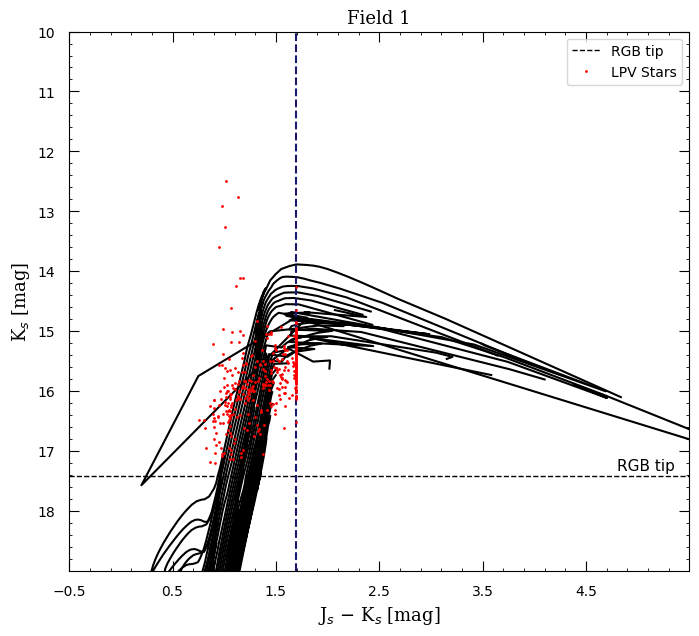

In [39]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'r.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
plt.savefig('Data-Correction-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [40]:
df_final = df_Corrected
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.12,S,0.055301,1.200
1,10784.00,296.215450,-14.834690,17.250,16.13,S,0.036084,1.120
2,11004.00,296.273410,-14.808610,17.400,16.20,S,0.043961,1.200
3,11029.00,296.283080,-14.804970,17.260,16.15,S,0.053182,1.110
4,12050.00,296.254270,-14.817640,17.970,16.63,S,0.029053,1.340
...,...,...,...,...,...,...,...,...
372,89.99,296.003693,-14.974893,18.192,17.14,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.27,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.59,s,0.011856,0.950
375,20022.00,296.208160,-14.726160,13.890,12.76,s,0.078605,1.130


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [41]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [42]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
182,0.01,-0.750,-7.390,NaN,-11.777
183,0.01,-0.402,-3.296,-11.777,-11.396
184,0.01,-0.173,-0.677,-11.396,-11.016
185,0.01,-0.301,-2.189,-11.016,-10.635
186,0.01,-0.217,-1.196,-10.635,-10.254
187,0.01,-0.583,-4.950,-10.254,-9.873
188,0.01,-0.305,-2.210,-9.873,-9.492
189,0.01,-0.309,-2.245,-9.492,-9.112
190,0.01,-0.410,-3.168,-9.112,-8.731
191,0.01,-0.292,-2.137,-8.731,-8.350


In [43]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [44]:
a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[df_final.index[10],'Ks'] - DM )
print(f'a: {a}   b: {b}')

a: -0.249   b: -1.776


In [45]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[i,'Ks'] - DM )
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

In [46]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms
0,10870.00,296.178920,-14.822860,17.320,16.12,S,0.055301,1.200,0.04148,1.100221
1,10784.00,296.215450,-14.834690,17.250,16.13,S,0.036084,1.120,0.03992,1.096276
2,11004.00,296.273410,-14.808610,17.400,16.20,S,0.043961,1.200,0.02900,1.069055
3,11029.00,296.283080,-14.804970,17.260,16.15,S,0.053182,1.110,0.03680,1.088429
4,12050.00,296.254270,-14.817640,17.970,16.63,S,0.029053,1.340,-0.03788,0.916474
...,...,...,...,...,...,...,...,...,...,...
372,89.99,296.003693,-14.974893,18.192,17.14,C,0.284993,1.052,-0.12254,0.754154
373,10032.00,296.226960,-14.801910,14.280,13.27,s,0.003049,1.010,0.98494,9.659174
374,10074.00,296.240050,-14.807960,14.540,13.59,s,0.011856,0.950,0.79730,6.270469
375,20022.00,296.208160,-14.726160,13.890,12.76,s,0.078605,1.130,1.02869,10.682921


(array([ 49., 152., 109.,  52.,   6.,   2.,   2.,   1.,   0.,   4.]),
 array([-0.13416 , -0.010049,  0.114062,  0.238173,  0.362284,  0.486395,
         0.610506,  0.734617,  0.858728,  0.982839,  1.10695 ]),
 <BarContainer object of 10 artists>)

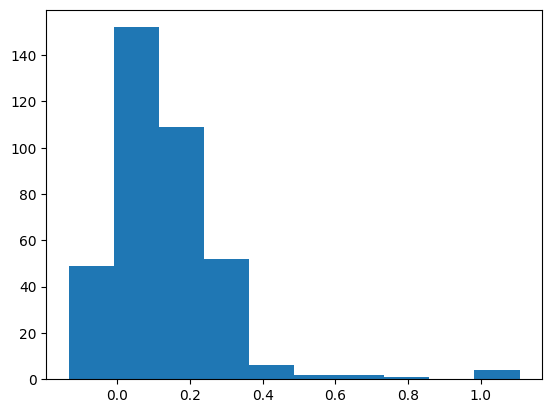

In [47]:
plt.hist(df_final['Log(M/Ms)'])

(array([335.,  33.,   3.,   1.,   1.,   0.,   0.,   1.,   1.,   2.]),
 array([ 0.73424331,  1.940053  ,  3.14586269,  4.35167237,  5.55748206,
         6.76329175,  7.96910144,  9.17491112, 10.38072081, 11.5865305 ,
        12.79234018]),
 <BarContainer object of 10 artists>)

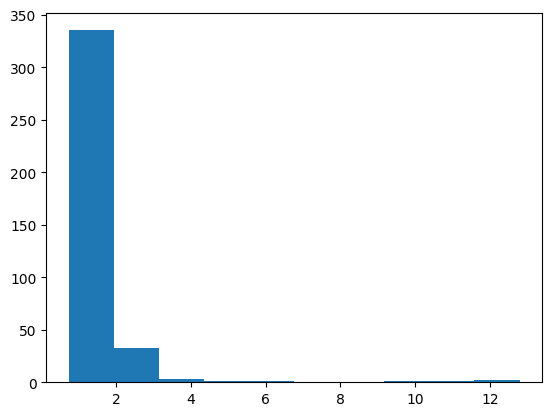

In [48]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [49]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [50]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
24,0.01,-3.256,9.993,NaN,0.179
25,0.01,-2.482,9.852,0.179,0.403
26,0.01,-2.865,10.007,0.403,0.626
27,0.01,-2.272,9.635,0.626,0.850
28,0.01,-1.852,9.278,0.850,1.073
29,0.01,-1.531,8.740,1.073,1.297
30,0.01,-0.955,8.227,1.297,1.520
31,0.01,-0.819,8.020,1.520,NaN


In [51]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [52]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -2.482   b: 9.852


In [53]:
round(df_final.loc[288,'Log(M/Ms)'],3)

0.125

In [54]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

In [55]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t
0,10870.00,296.178920,-14.822860,17.320,16.12,S,0.055301,1.200,0.04148,1.100221,9.857941,7.210097e+09
1,10784.00,296.215450,-14.834690,17.250,16.13,S,0.036084,1.120,0.03992,1.096276,9.863020,7.294919e+09
2,11004.00,296.273410,-14.808610,17.400,16.20,S,0.043961,1.200,0.02900,1.069055,9.898576,7.917280e+09
3,11029.00,296.283080,-14.804970,17.260,16.15,S,0.053182,1.110,0.03680,1.088429,9.873179,7.467568e+09
4,12050.00,296.254270,-14.817640,17.970,16.63,S,0.029053,1.340,-0.03788,0.916474,10.116337,1.307186e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
372,89.99,296.003693,-14.974893,18.192,17.14,C,0.284993,1.052,-0.12254,0.754154,10.391990,2.465984e+10
373,10032.00,296.226960,-14.801910,14.280,13.27,s,0.003049,1.010,0.98494,9.659174,7.453891,2.843748e+07
374,10074.00,296.240050,-14.807960,14.540,13.59,s,0.011856,0.950,0.79730,6.270469,7.823534,6.660923e+07
375,20022.00,296.208160,-14.726160,13.890,12.76,s,0.078605,1.130,1.02869,10.682921,7.372866,2.359751e+07


(array([  3.,   1.,   1.,   4.,   1.,  22.,  91.,  97., 121.,  36.]),
 array([ 7.04525955,  7.38371609,  7.72217263,  8.06062917,  8.39908571,
         8.73754226,  9.0759988 ,  9.41445534,  9.75291188, 10.09136842,
        10.42982496]),
 <BarContainer object of 10 artists>)

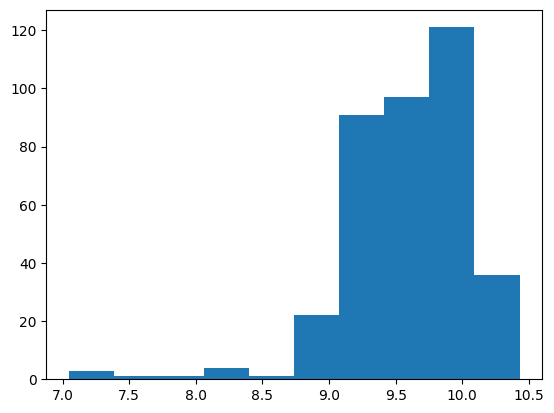

In [56]:
plt.hist(df_final['Log(t)'])

(array([127.,  81.,  84.,  36.,  20.,   8.,   4.,   8.,   5.,   4.]),
 array([1.10983790e+07, 2.70043876e+09, 5.38977913e+09, 8.07911951e+09,
        1.07684599e+10, 1.34578003e+10, 1.61471406e+10, 1.88364810e+10,
        2.15258214e+10, 2.42151618e+10, 2.69045021e+10]),
 <BarContainer object of 10 artists>)

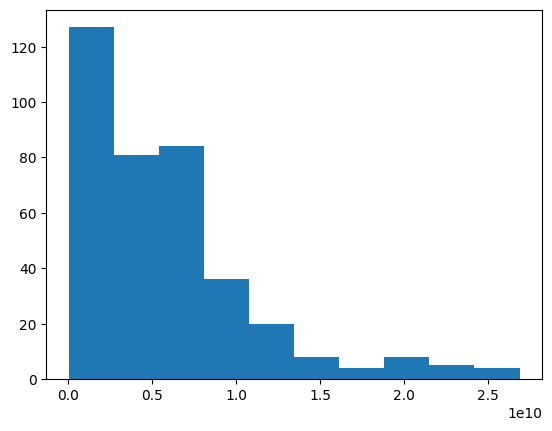

In [57]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [58]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [59]:
Mass_Pulsation

,Z,I,a,b,c,D
52,0.01,1,3.056,1.062,0.209,-8.225
53,0.01,2,0.697,0.711,0.095,0.000
54,0.01,3,6.275,1.444,0.333,0.000
55,0.01,4,5.593,0.385,0.598,0.000


In [60]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D 

In [61]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 0.697   b: 0.711  c: 0.095  D: -8.225


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [62]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)
  
  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [63]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,10870.00,296.178920,-14.822860,17.320,16.12,S,0.055301,1.200,0.04148,1.100221,9.857941,7.210097e+09,5.653919,450732.759386
1,10784.00,296.215450,-14.834690,17.250,16.13,S,0.036084,1.120,0.03992,1.096276,9.863020,7.294919e+09,5.646938,443545.198419
2,11004.00,296.273410,-14.808610,17.400,16.20,S,0.043961,1.200,0.02900,1.069055,9.898576,7.917280e+09,5.597580,395895.282347
3,11029.00,296.283080,-14.804970,17.260,16.15,S,0.053182,1.110,0.03680,1.088429,9.873179,7.467568e+09,5.632921,429458.406004
4,12050.00,296.254270,-14.817640,17.970,16.63,S,0.029053,1.340,-0.03788,0.916474,10.116337,1.307186e+10,5.283421,192053.151238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,89.99,296.003693,-14.974893,18.192,17.14,C,0.284993,1.052,-0.12254,0.754154,10.391990,2.465984e+10,4.888467,77351.227365
373,10032.00,296.226960,-14.801910,14.280,13.27,s,0.003049,1.010,0.98494,9.659174,7.453891,2.843748e+07,4.878981,75679.917673
374,10074.00,296.240050,-14.807960,14.540,13.59,s,0.011856,0.950,0.79730,6.270469,7.823534,6.660923e+07,4.139798,13797.422306
375,20022.00,296.208160,-14.726160,13.890,12.76,s,0.078605,1.130,1.02869,10.682921,7.372866,2.359751e+07,5.207545,161266.765725


(array([  1.,   0.,   0.,  17.,  18.,  35.,  57.,  75.,  59., 115.]),
 array([4.13979796, 4.36220152, 4.58460508, 4.80700863, 5.02941219,
        5.25181575, 5.47421931, 5.69662287, 5.91902643, 6.14142999,
        6.36383355]),
 <BarContainer object of 10 artists>)

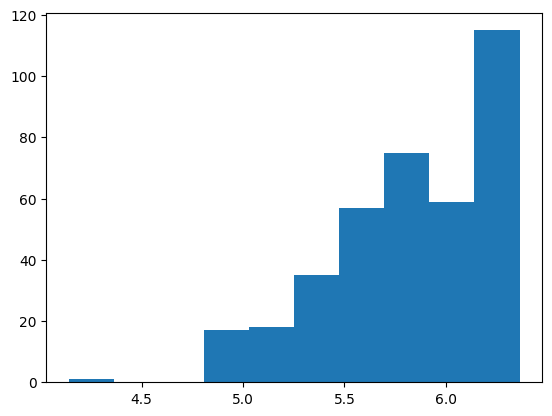

In [64]:
plt.hist(df_final['Log(dt)'])

(array([55., 67., 62., 27., 25., 26., 22., 19., 24., 50.]),
 array([  13797.42230648,  243535.56096774,  473273.699629  ,
         703011.83829026,  932749.97695152, 1162488.11561278,
        1392226.25427404, 1621964.3929353 , 1851702.53159656,
        2081440.67025783, 2311178.80891909]),
 <BarContainer object of 10 artists>)

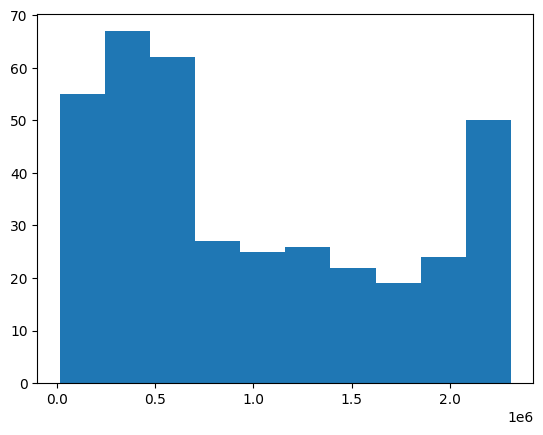

In [65]:
plt.hist(df_final['dt'])

## Data Saving

In [66]:
df_final.to_csv('NGC6822_LPV_Data_'+ Z_name +'.csv', index=False)